# Seminar 3

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

### Convolution demonstration

In [ ]:
!wget https://raw.githubusercontent.com/Majid-Sohrabi/MLDM-2024/main/10-convolutions/img.npy

--2025-01-28 17:04:36--  https://raw.githubusercontent.com/Majid-Sohrabi/MLDM-2024/main/10-convolutions/img.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960128 (938K) [application/octet-stream]
Saving to: ‘img.npy’

img.npy             100%[===================>] 937.62K  --.-KB/s    in 0.04s   

2025-01-28 17:04:37 (21.5 MB/s) - ‘img.npy’ saved [960128/960128]



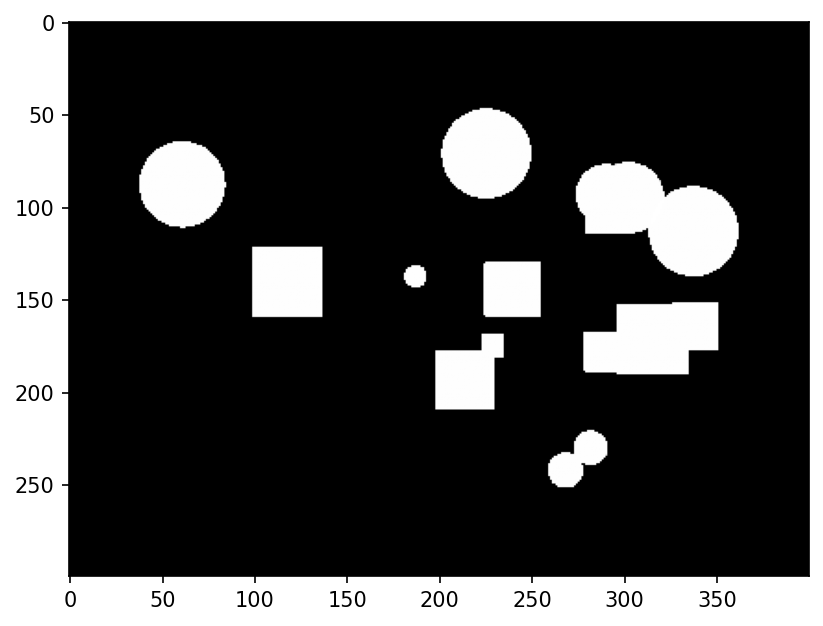

In [ ]:
import numpy as np

img = np.load("img.npy")

plt.figure(dpi=150)
plt.imshow(img, cmap='gray');

In [ ]:
from torch import nn
def convolve(img, kernel):
    kernel = kernel[None, None, ...]

    result = nn.functional.conv2d(img[None, None, ...].float(), kernel)

    return result.squeeze()

In [ ]:
kernel_hor_edge = torch.tensor(
    [[ 1.,  1.],
     [-1., -1.]]
)

In [ ]:
#part of horizontal line
print('Line   :', convolve(torch.tensor(
    [[ 0., 0.],
     [ 1., 1.]]
), kernel_hor_edge))

#part of horizontal line, inversed
print('Line   :', convolve(torch.tensor(
    [[ 1., 1.],
     [ 0., 0.]]
), kernel_hor_edge))

#monocolor (no horizontal line here)
print('No line:', convolve(torch.tensor(
    [[ 0., 0.],
     [ 0., 0.]]
), kernel_hor_edge))

#monocolor (no horizontal line here)
print('No line:', convolve(torch.tensor(
    [[ 1., 1.],
     [ 1., 1.]]
), kernel_hor_edge))

#part of vertical line (no horizontal line here)
print('No line:', convolve(torch.tensor(
    [[ 1., 0.],
     [ 1., 0.]]
), kernel_hor_edge))

#part of diagonal line (no horizontal line here)
print('No line:', convolve(torch.tensor(
    [[ 1., 0.],
     [ 0., 1.]]
), kernel_hor_edge))

Line   : tensor(-2.)
Line   : tensor(2.)
No line: tensor(0.)
No line: tensor(0.)
No line: tensor(0.)
No line: tensor(0.)


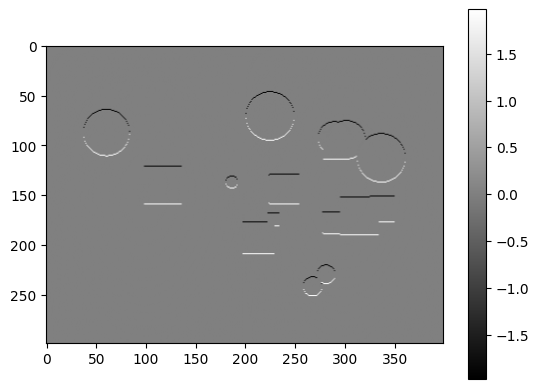

In [ ]:
horizontal_edges = convolve(torch.from_numpy(img), kernel_hor_edge)

plt.imshow(horizontal_edges, cmap='gray');
plt.colorbar();

### Dataset

Let's work with dataset Fashion MNIST:

In [ ]:
#Preprocessing
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.7MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.72MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 8.79MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



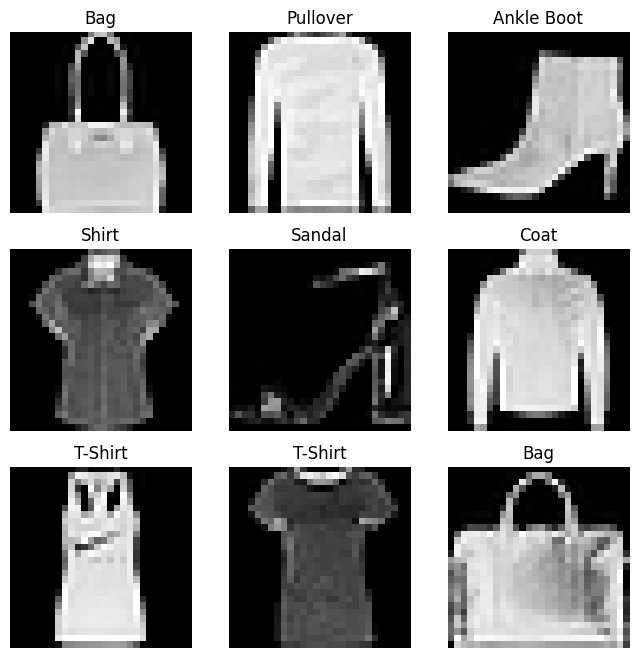

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
training_data[0][0].shape, training_data[0][1]

(torch.Size([1, 28, 28]), 9)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)

        #Need to compute the input dim
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=-1)

In [ ]:
model = Net()
tt = torch.rand([4, 1, 28, 28])

#Let's check if it works
output = model(tt)

print('Model outputs: \n', output)

Model outputs: 
 tensor([[-2.2574, -2.3373, -2.2971, -2.3476, -2.2929, -2.2608, -2.2389, -2.3843,
         -2.3347, -2.2845],
        [-2.2543, -2.3382, -2.2958, -2.3467, -2.2974, -2.2619, -2.2302, -2.3871,
         -2.3408, -2.2840],
        [-2.2555, -2.3363, -2.2985, -2.3471, -2.2971, -2.2609, -2.2350, -2.3841,
         -2.3379, -2.2833],
        [-2.2567, -2.3366, -2.2956, -2.3415, -2.2959, -2.2705, -2.2348, -2.3832,
         -2.3365, -2.2838]], grad_fn=<LogSoftmaxBackward0>)


In [ ]:
probs = torch.exp(output)
print('Probs: \n', probs)

Probs: 
 tensor([[0.1041, 0.1058, 0.1019, 0.0999, 0.0981, 0.1038, 0.0959, 0.0938, 0.0981,
         0.0987],
        [0.1040, 0.1056, 0.1019, 0.1002, 0.0984, 0.1041, 0.0961, 0.0933, 0.0984,
         0.0981],
        [0.1043, 0.1060, 0.1020, 0.1000, 0.0984, 0.1034, 0.0959, 0.0940, 0.0977,
         0.0984],
        [0.1044, 0.1054, 0.1021, 0.1002, 0.0983, 0.1034, 0.0959, 0.0936, 0.0984,
         0.0983]], grad_fn=<ExpBackward0>)


In [ ]:
probs.sum(dim=-1)

tensor([1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

In [ ]:
pred = probs.argmax(dim=-1)
print('Pred: \n', pred.data.numpy())

Pred: 
 [1 1 1 1]


### Data iterator




To conveniently iterate through data in PyTorch, there's the `Dataset` class - allowing you to describe how to specifically work with your dataset. Example from PyTorch [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

Currently we have a PyTorch dataset, it's already in the correct format automatically. But for custom datasets it can be useful when:

* Cannot load all data into computer memory (downloaded all Internet texts) - need to read each batch from files
* Data needs to be preprocessed consistently (convert to tensor, normalize, etc.), add augmentations
* Target variable is not defined through a separate array (For example, class is specified in filename: positive_comment_1232.txt, bot_text_example.docx)

The dataset describes \_\_init\_\_, \_\_len\_\_, and \_\_getitem\_\_  - initialization, total number of objects, how to get by index (open and read from file? Transform? Separate target variable?)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self):
        pass

    def __len__(self):
        return 10

    def __getitem__(self, idx):
        #object and target
        return idx, idx ** 2

custom = CustomDataset()
len(custom), custom[4]

(10, (4, 16))

For working with batches from a dataset, there are dataloaders - generators that output dataset objects.

Advantages:

* Guaranteed to get the entire sample in one pass through the dataloader
* Objects can be given in random order

In [ ]:
custom_loader = torch.utils.data.DataLoader(custom, batch_size=4, shuffle=True)
print('first run')
for batch in custom_loader:
  print(batch)

print('second run')
for batch in custom_loader:
  print(batch)

first run
[tensor([3, 9, 1, 8]), tensor([ 9, 81,  1, 64])]
[tensor([7, 4, 5, 2]), tensor([49, 16, 25,  4])]
[tensor([0, 6]), tensor([ 0, 36])]
second run
[tensor([7, 6, 3, 4]), tensor([49, 36,  9, 16])]
[tensor([5, 8, 2, 9]), tensor([25, 64,  4, 81])]
[tensor([0, 1]), tensor([0, 1])]


In [ ]:
training_loader = torch.utils.data.DataLoader(training_data, batch_size=4, shuffle=True)
validation_loader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False)

In [ ]:
len(training_data)

60000

In [ ]:
len(training_loader)

15000

### Some functions

In [ ]:
import tqdm

def train(model, optimizer, training_loader):
    loss_log, acc_log = [], []


    model.train()

    for data, target in tqdm.tqdm(training_loader):

        optimizer.zero_grad()

        output = model(data)
        loss = F.nll_loss(output, target)

        loss.backward()
        optimizer.step()
        loss = loss.item()
        loss_log.append(loss)

        preds = output.argmax(dim=-1)
        acc = (preds == target).sum() / len(target)
        acc_log.append(acc.item())

    return loss_log, acc_log



def test(model, test_loader):
    loss_log, acc_log= [], []


    model.eval()
    for data, target in tqdm.tqdm(test_loader):

        with torch.no_grad():
          output = model(data)
          loss = F.nll_loss(output, target)

          loss = loss.item()
          preds = output.argmax(dim=-1)

        loss_log.append(loss)
        acc = (preds == target).sum() / len(target)
        acc_log.append(acc.item())


    return loss_log, acc_log


In [ ]:
def plot_history(train_history, val_history, metric='loss', steps_test=1):
    plt.figure()
    plt.plot(train_history, label='Train ' + metric)
    plt.plot(np.arange(0, len(val_history)) * steps_test, val_history, label='Validation ' + metric)
    plt.legend()
    plt.show()

In [ ]:
for data, target in training_loader:
  print(data.shape)
  break

torch.Size([4, 1, 28, 28])


In [ ]:
train_log, train_acc_log, val_acc_log = [], [], []
val_log = []

model = Net()
opt = torch.optim.SGD(model.parameters(), lr=0.001)
best_acc = -1

for epoch in range(10):
    train_loss, train_acc = np.mean(train(model, opt, training_loader), axis=1)
    train_log.append(train_loss)
    train_acc_log.append(train_acc)


    val_loss, val_acc = np.mean(test(model, validation_loader), axis=1)
    val_log.append(val_loss)
    val_acc_log.append(val_acc)


    plot_history(train_acc_log, val_acc_log, metric='accuracy')


 85%|████████▍ | 12749/15000 [01:06<00:11, 191.65it/s]


KeyboardInterrupt: 


Problem: long training time

Reason: lots of data (many batches), many parameters, model usage takes long, gradient calculations are long.

Solution: GPU instead of CPU

Note: when changing the environment in Colab, the session restarts. The free version has limitations on GPU usage.

In [ ]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cuda', index=0)

In [ ]:
import tqdm

def train(model, optimizer, training_loader):
    loss_log, acc_log= [], []


    model.train()
    for data, target in tqdm.tqdm(training_loader):

        #move to DEVICE
        data, target = data.to(DEVICE), target.to(DEVICE)


        optimizer.zero_grad()

        output = model(data)
        loss = F.nll_loss(output, target)


        loss.backward()
        optimizer.step()
        loss = loss.item()
        loss_log.append(loss)


        preds = output.argmax(dim=-1)
        acc = (preds == target).sum() / len(target)
        acc_log.append(acc.cpu().item())

    return loss_log, acc_log


def test(model, test_loader):
    loss_log, acc_log= [], []

    model.eval()
    for data, target in tqdm.tqdm(test_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)

        with torch.no_grad():
          output = model(data)
          loss = F.nll_loss(output, target)

          loss = loss.item()
          preds = output.argmax(dim=-1)

        loss_log.append(loss)
        acc = (preds == target).sum() / len(target)
        acc_log.append(acc.cpu().item())


    return loss_log, acc_log

100%|██████████| 2500/2500 [00:04<00:00, 584.54it/s]


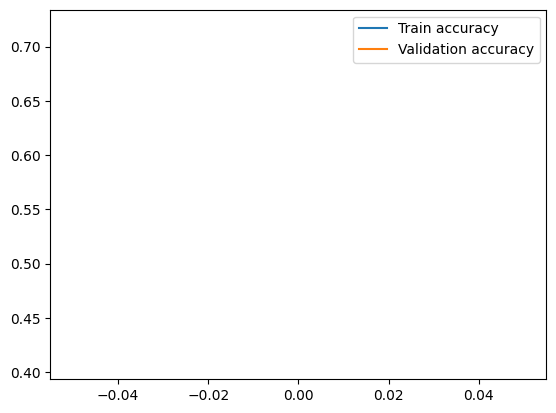

100%|██████████| 2500/2500 [00:05<00:00, 473.46it/s]


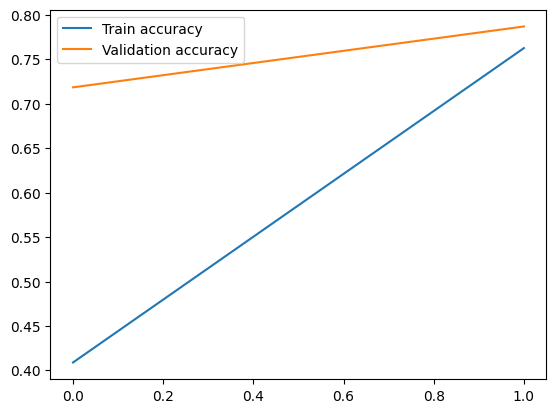

100%|██████████| 2500/2500 [00:04<00:00, 513.76it/s]


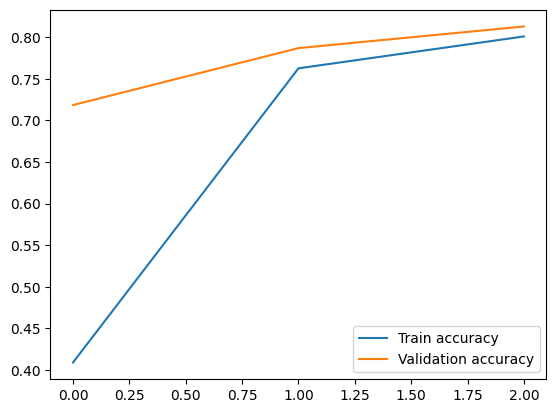

100%|██████████| 2500/2500 [00:04<00:00, 588.52it/s]


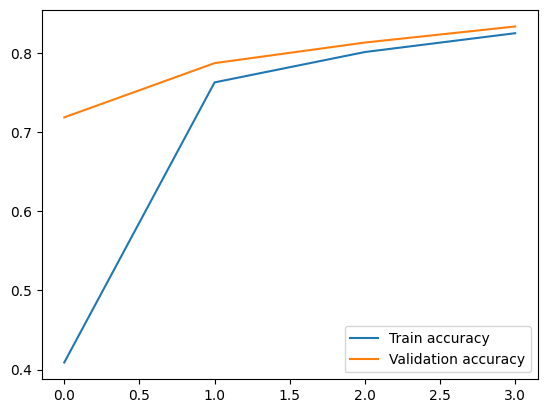

100%|██████████| 2500/2500 [00:04<00:00, 575.96it/s]


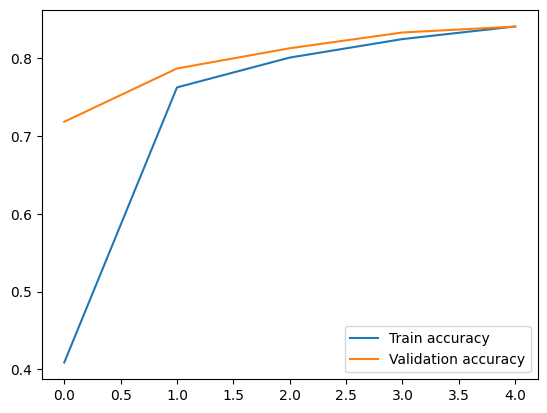

100%|██████████| 2500/2500 [00:05<00:00, 493.62it/s]


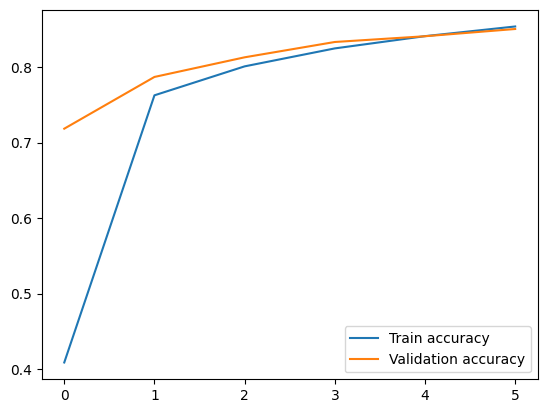

100%|██████████| 2500/2500 [00:04<00:00, 540.76it/s]


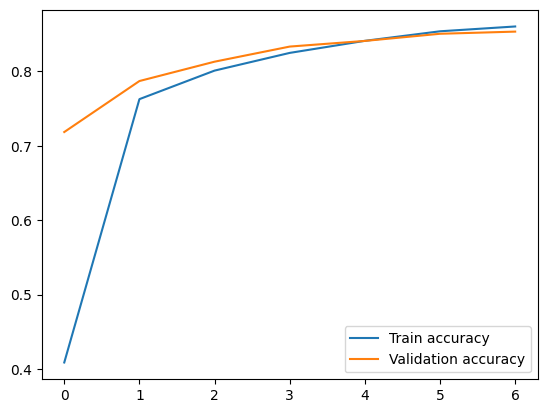

100%|██████████| 2500/2500 [00:04<00:00, 563.58it/s]


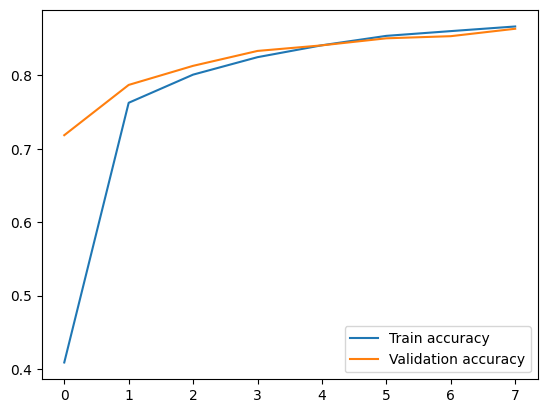

100%|██████████| 2500/2500 [00:04<00:00, 535.10it/s]


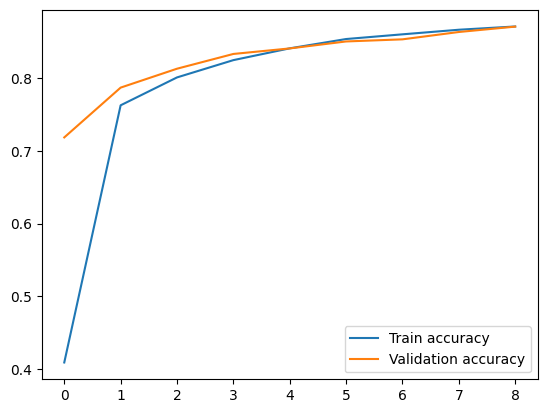

100%|██████████| 2500/2500 [00:05<00:00, 475.91it/s]


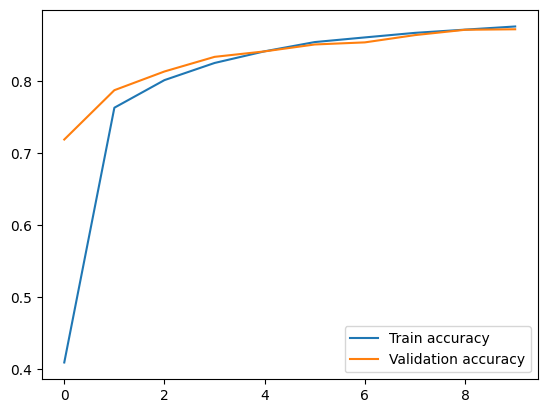

In [ ]:
import numpy as np

train_log, train_acc_log, val_acc_log = [], [], []
val_log = []

#model = Net().to(DEVICE)
opt = torch.optim.SGD(model.parameters(), lr=0.001)
best_acc = -1

for epoch in range(10):
    train_loss, train_acc = np.mean(train(model, opt, training_loader), axis=1)
    train_log.append(train_loss)
    train_acc_log.append(train_acc)

    if epoch % 2 == 0:
      torch.save(model.state_dict(), 'model_checkpoint.pt')

    val_loss, val_acc= np.mean(test(model, validation_loader), axis=1)
    val_log.append(val_loss)
    val_acc_log.append(val_acc)

    if val_acc > best_acc:
      torch.save(model.state_dict(), 'model_best.pt')
      best_acc = val_acc




    plot_history(train_acc_log, val_acc_log, metric='accuracy')

The run time may not be significantly lower right now, but for big models ot will be crucial (20 min. vs 2 sec.)

In [ ]:
torch.save(model.state_dict(), 'model.pt')

In [ ]:
sum(p.numel() for p in model.parameters())

44426

### Feature maps

In [ ]:
for data, target in training_loader:
  example_data, example_target = data, target
  break

In [ ]:
example_after_1 = F.relu(model.conv1(example_data.to(DEVICE)))

example_after_2 = F.relu(model.conv2(model.pool(example_after_1)))

In [ ]:
model.pool(example_after_1).shape

torch.Size([4, 6, 12, 12])

In [ ]:
example_after_1.shape, example_after_2.shape

(torch.Size([4, 6, 24, 24]), torch.Size([4, 16, 8, 8]))

Initial image:

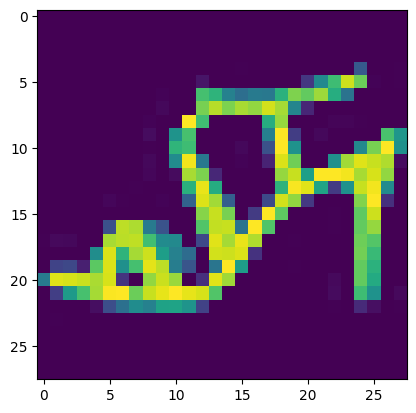

In [ ]:
plt.imshow(example_data[0, 0])

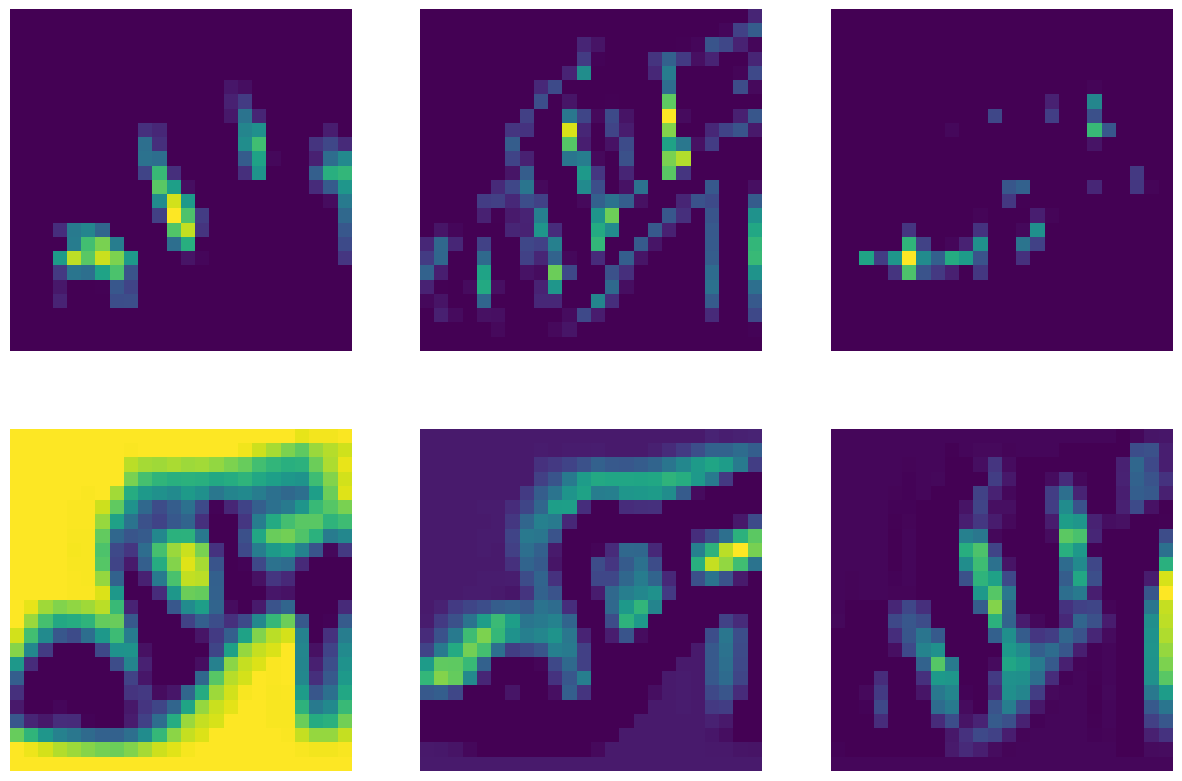

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows=2, figsize=(15, 10))
for i in range(6):
  axs[i // 3][i % 3].imshow(example_after_1[0, i].cpu().detach().numpy())
  axs[i // 3][i % 3].axis('off')

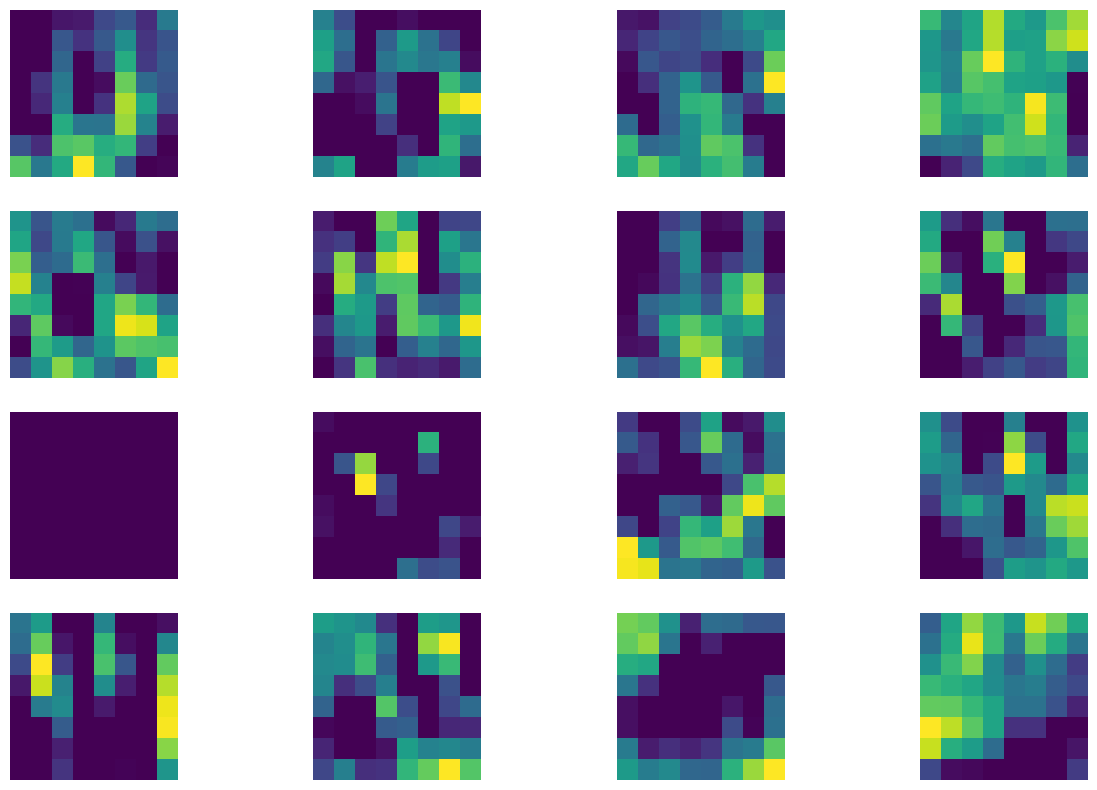

In [ ]:
fig, axs = plt.subplots(ncols = 4, nrows=4, figsize=(15, 10))
for i in range(16):
  axs[i // 4][i % 4].imshow(example_after_2[0, i].cpu().detach().numpy())
  axs[i // 4][i % 4].axis('off')

Let's check some pretrained model: [ResNet](https://arxiv.org/abs/1512.03385)

In [ ]:
from torchvision.models import resnet18
from torchsummary import summary
import torch
import numpy as np

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = resnet18('ResNet18_Weights.IMAGENET1K_V1').to(DEVICE)
summary(model, (3, 244, 244))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 165MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 122, 122]           9,408
       BatchNorm2d-2         [-1, 64, 122, 122]             128
              ReLU-3         [-1, 64, 122, 122]               0
         MaxPool2d-4           [-1, 64, 61, 61]               0
            Conv2d-5           [-1, 64, 61, 61]          36,864
       BatchNorm2d-6           [-1, 64, 61, 61]             128
              ReLU-7           [-1, 64, 61, 61]               0
            Conv2d-8           [-1, 64, 61, 61]          36,864
       BatchNorm2d-9           [-1, 64, 61, 61]             128
             ReLU-10           [-1, 64, 61, 61]               0
       BasicBlock-11           [-1, 64, 61, 61]               0
           Conv2d-12           [-1, 64, 61, 61]          36,864
      BatchNorm2d-13           [-1, 64, 61, 61]             128
             ReLU-14           [-1, 64,

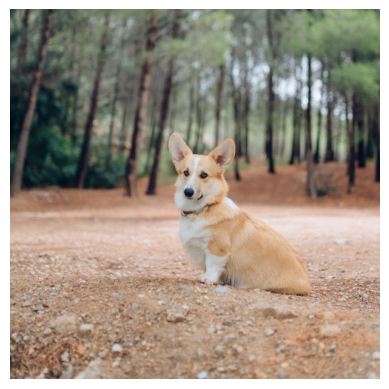

In [ ]:
from torchvision.io import read_image
import matplotlib.pyplot as plt
import torch
import numpy as np



dog1 = read_image('dog1.jpg')
dog2 = read_image('dog1.jpg')

batch = torch.stack([dog1, dog2]).float().to(DEVICE)



plt.imshow(batch[0].cpu().permute(1, 2, 0).int())
plt.axis('off')
plt.show()

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook


model.conv1.register_forward_hook(get_activation('conv1'))
model.layer1[0].conv1.register_forward_hook(get_activation('layer1_0_conv1'))
model.layer4[1].conv1.register_forward_hook(get_activation('layer4_1_conv1'))

output = model(batch)

In [ ]:
output.argmax()

tensor(463, device='cuda:0')

In [ ]:
batch.shape

torch.Size([2, 3, 500, 500])

In [ ]:
activation['conv1'].shape, activation['layer1_0_conv1'].shape, activation['layer4_1_conv1'].shape

(torch.Size([2, 64, 250, 250]),
 torch.Size([2, 64, 125, 125]),
 torch.Size([2, 512, 16, 16]))



Let's start from the first layer. We can see edges, important points

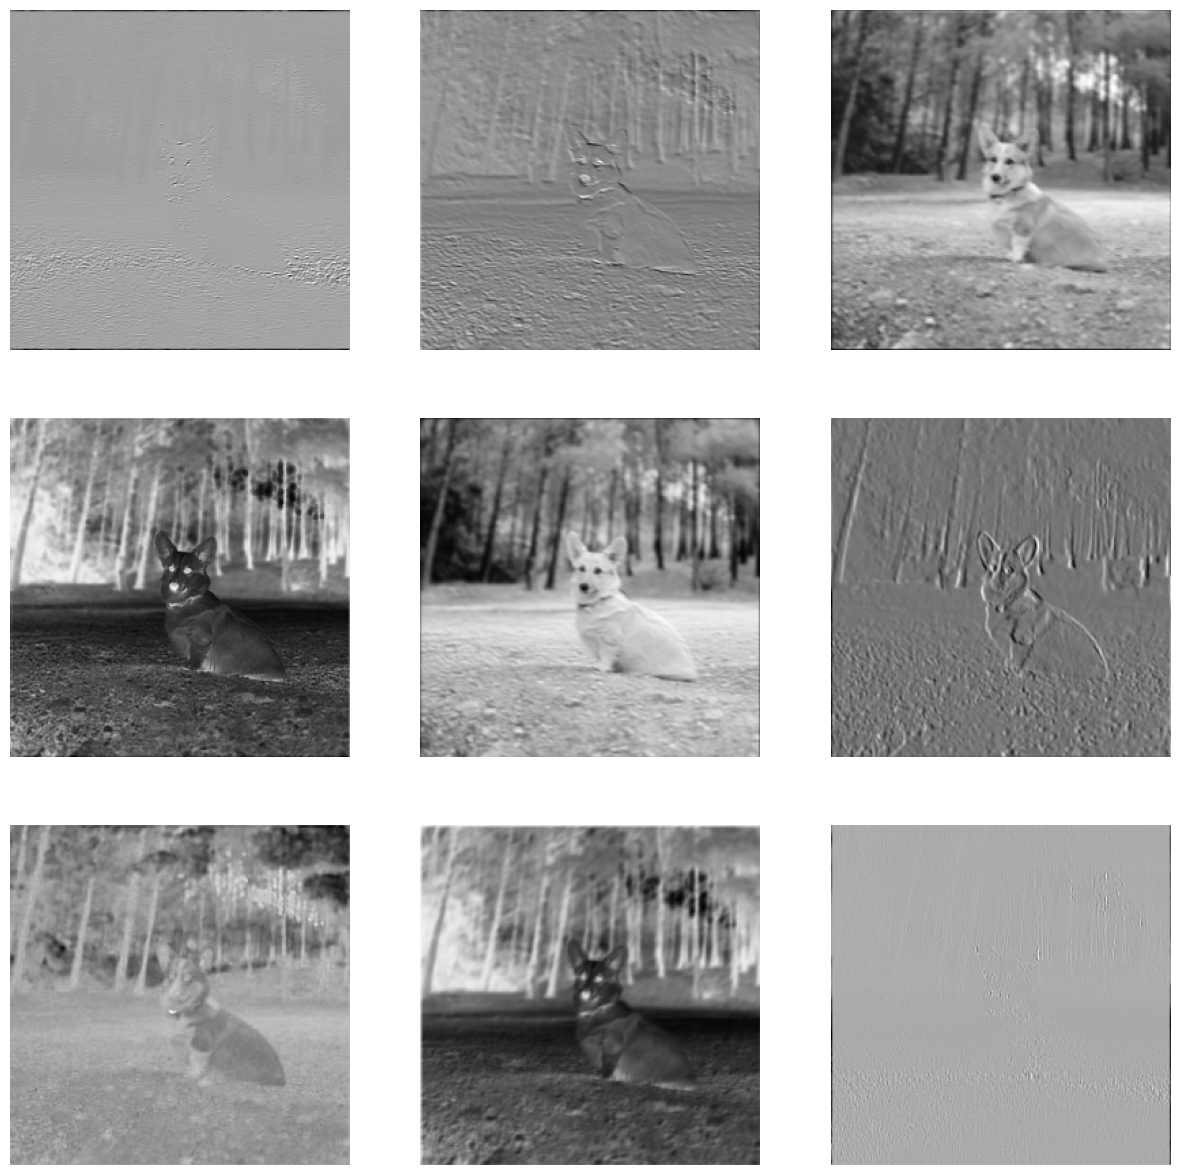

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows=3, figsize=(15, 15))
for i in range(9):
  axs[i // 3][i % 3].imshow(activation['conv1'][0, i].cpu().detach().numpy(),  cmap="gray")
  axs[i // 3][i % 3].axis('off')

Deeper layer: eyes, nose, collar, trees.

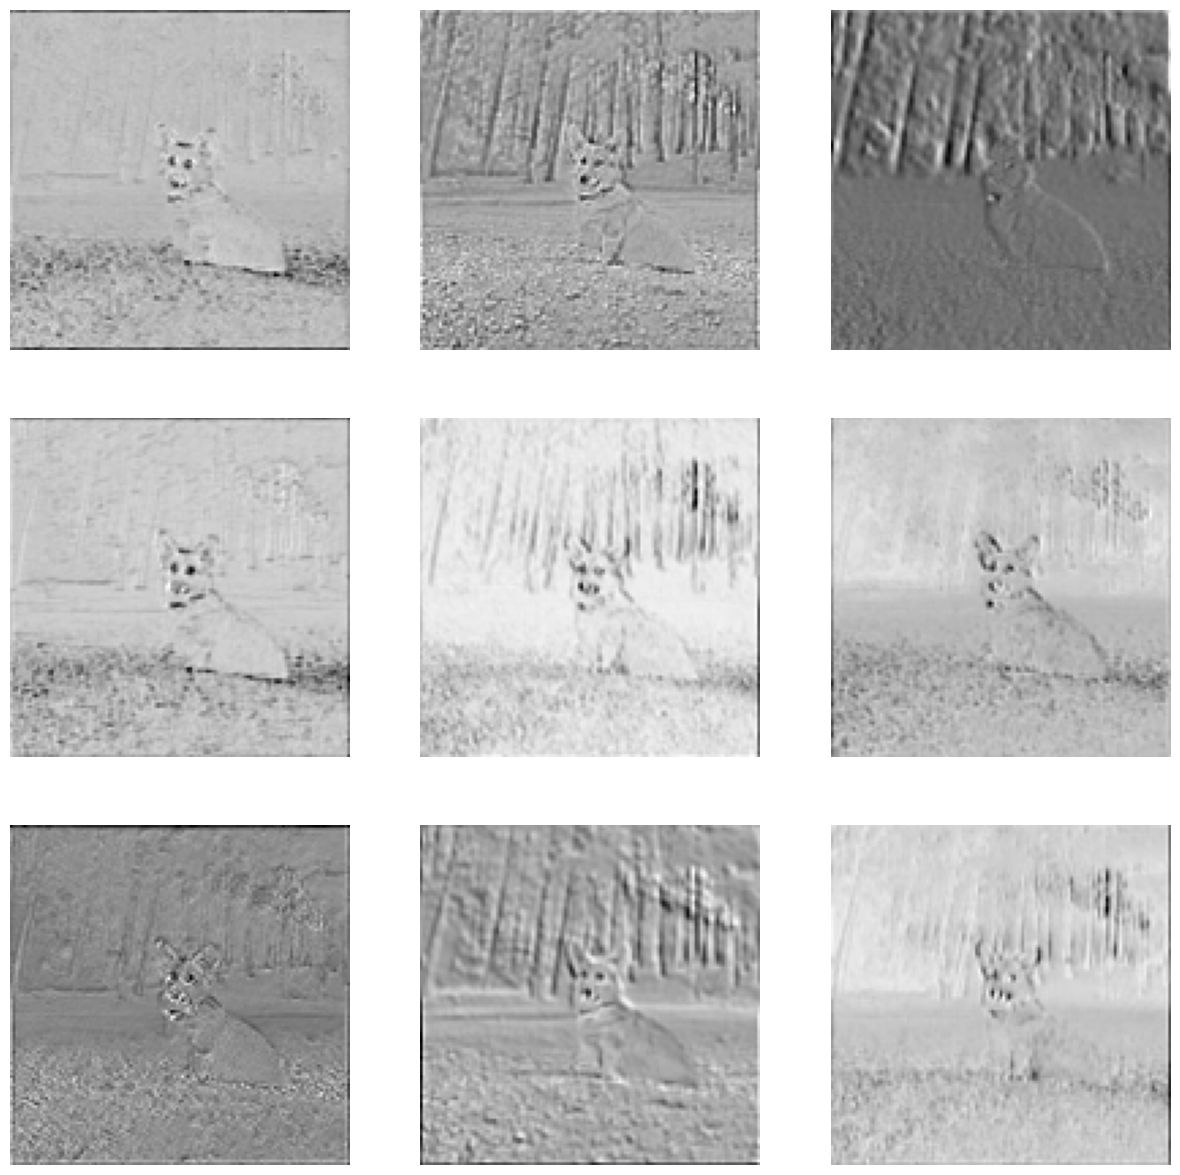

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows=3, figsize=(15, 15))
for i in range(9):
  axs[i // 3][i % 3].imshow(activation['layer1_0_conv1'][0, i].cpu().detach().numpy(), cmap="gray")
  axs[i // 3][i % 3].axis('off')

One of the last layers: ???

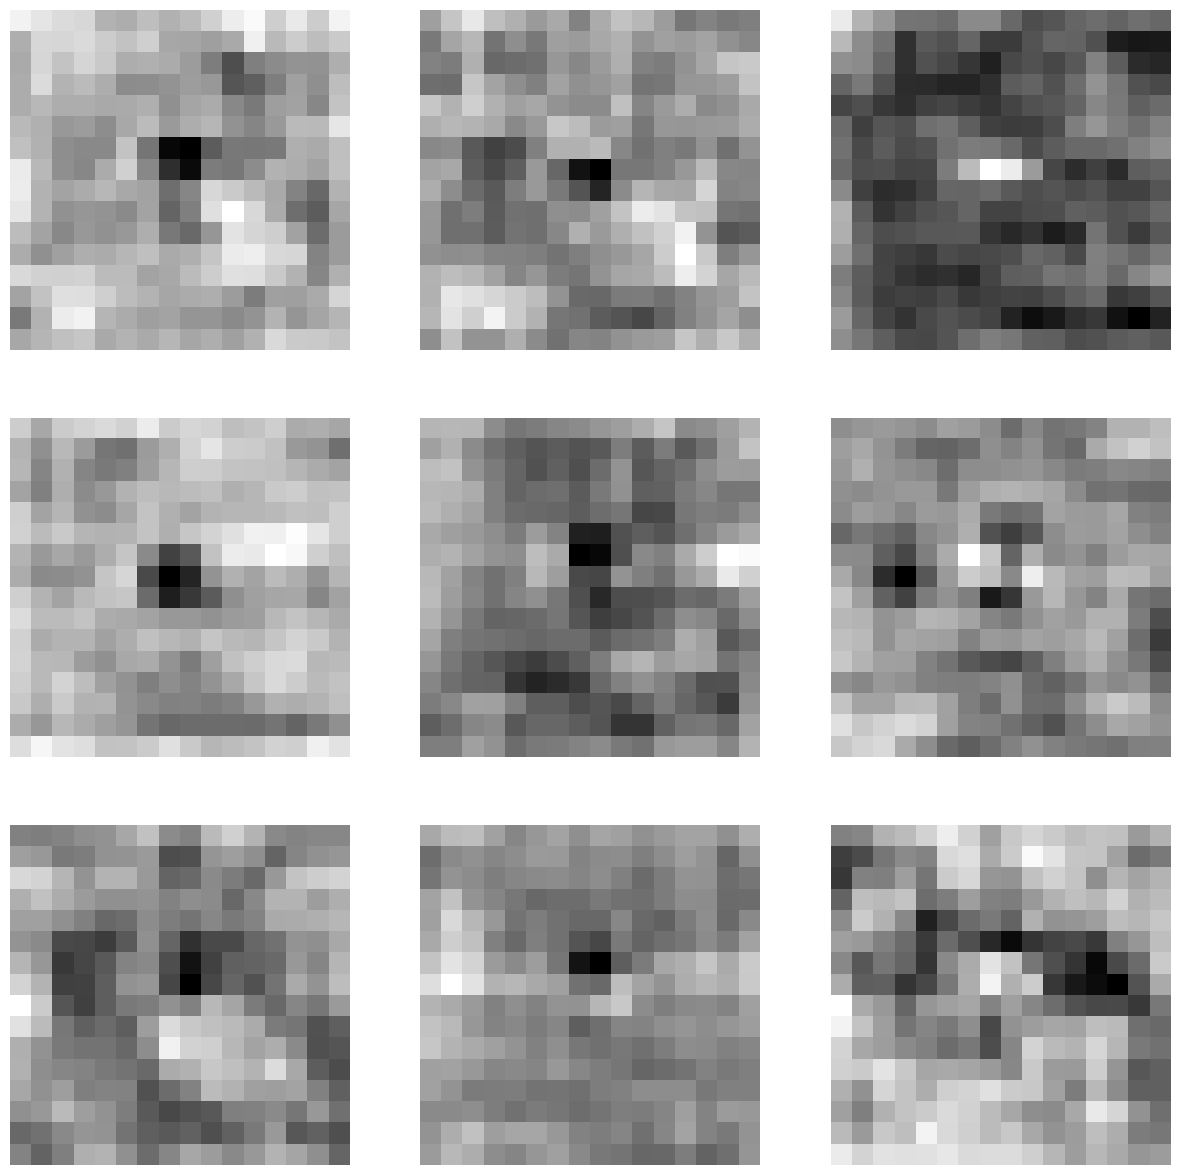

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows=3, figsize=(15, 15))
for i in range(9):
  axs[i // 3][i % 3].imshow(activation['layer4_1_conv1'][0, i].cpu().detach().numpy(), cmap="gray")
  axs[i // 3][i % 3].axis('off')

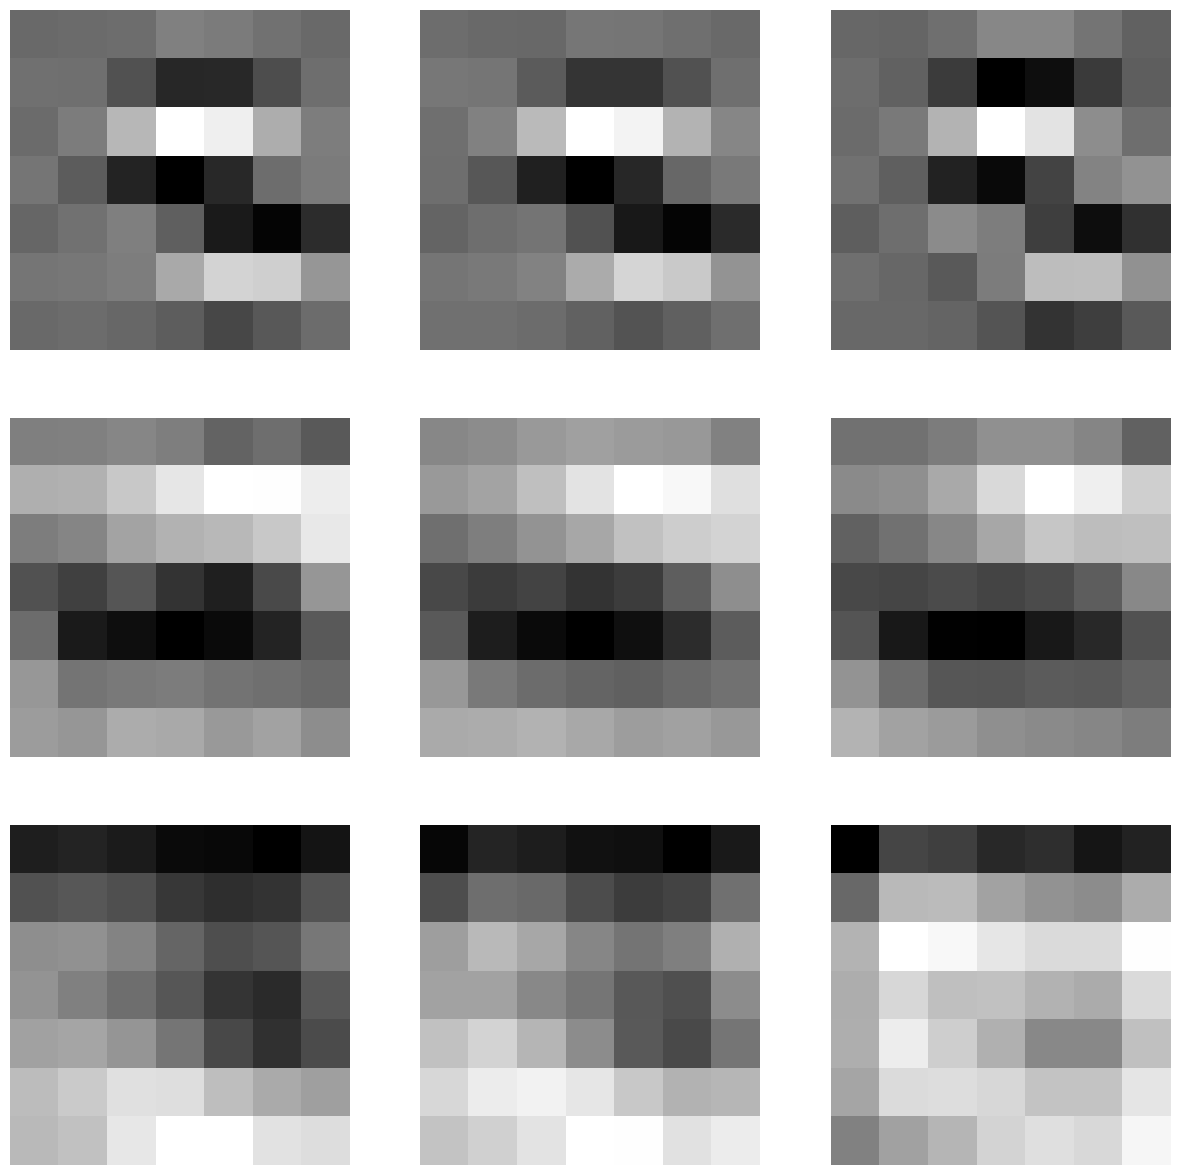

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows=3, figsize=(15, 15))
for i in range(9):
  axs[i // 3][i % 3].imshow(model.conv1.weight[i // 3, i % 3].cpu().detach().numpy(), cmap="gray")
  axs[i // 3][i % 3].axis('off')

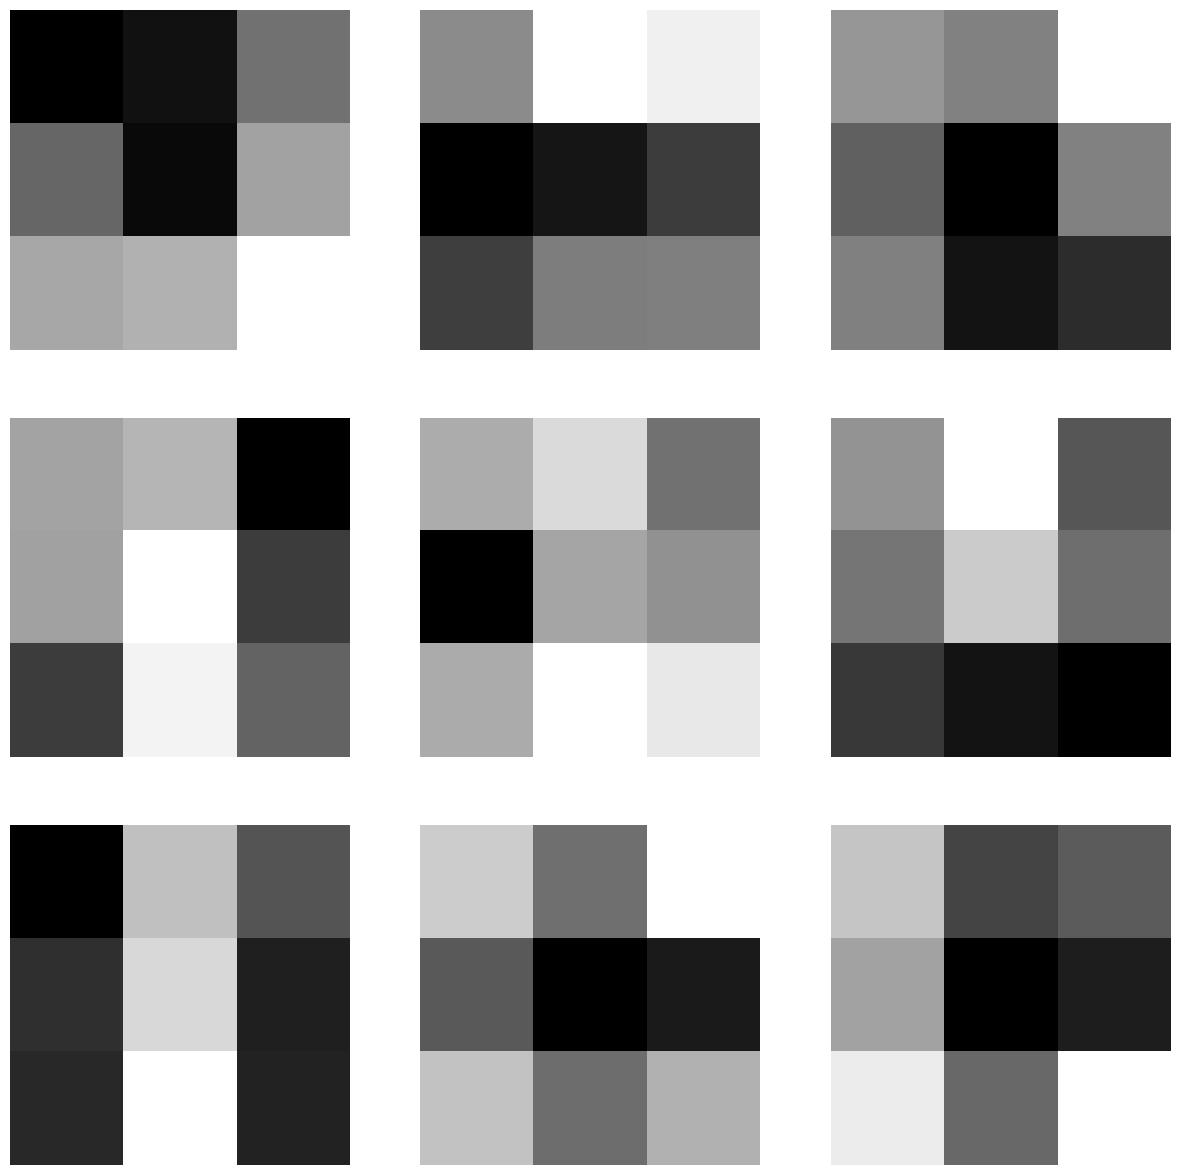

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows=3, figsize=(15, 15))
for i in range(9):
  axs[i // 3][i % 3].imshow(model.layer4[1].conv1.weight[i // 3, i % 3].cpu().detach().numpy(), cmap="gray")
  axs[i // 3][i % 3].axis('off')

### Sources



https://github.com/aosokin/dl_cshse_ami/blob/master/2019-fall/seminars/seminar2/DL19-fall-seminar2.ipynb

https://github.com/Majid-Sohrabi/MLDM-2024/blob/main/10-convolutions/CNNs.ipynb